Se adjunta una carpeta con algunas muestras del DataSet “Brain MRI Images for Brain Tumor Detection” que dos categorás de imágenes. Una categoría correspondiente a aquelas en las que no se detecta “anomalías” relacionadas con el desarrollo de tumores, y la otra categoría con imágenes donde se aprecia la aparición de tumores.

a. Se deben aplicar los algoritmos necesarios mediante el uso de la librería OpenCV, para mejorar la imagen, poder segmentar/diferenciar, los que corresponde a estructuras y tejidos normales de los tumores, Para ello pueden aplicarse algoritmos de modificación del histograma, equalización, etc.

b. Aplicar algoritmos para la generación de pseudocolor que realcen las estructuras de las imágenes.
c. Aplicar algoritmos de umbralización para seleccionar el área correspondiente a tumor. Extraer las estadísticas que indiquen el porcentaje que ocupa el tumor, en relación al volumen de la imagen cerebral.
Negativo

(([], []), ([], []))

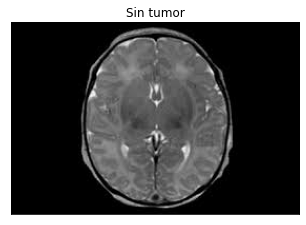

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("BrainTumor/No/12 no.jpg",0)
plt.figure(figsize = (30,30))

plt.subplot(251)
plt.imshow(img, cmap = 'gray'),plt.title('Sin tumor')
plt.xticks([]), plt.yticks([]) 


(([], []), ([], []))

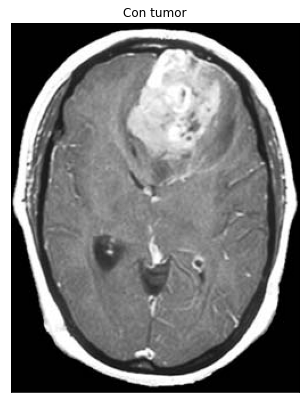

In [2]:
img2 = cv.imread("BrainTumor/Si/Y13.jpg",0)
plt.figure(figsize = (30,30))
plt.subplot(252)
plt.imshow(img2, cmap = 'gray'),plt.title('Con tumor')
plt.xticks([]), plt.yticks([])  

Se deben aplicar los algoritmos necesarios mediante el uso de la librería OpenCV, para mejorar la imagen, poder segmentar/diferenciar, los que corresponde a estructuras y tejidos normales de los tumores, Para ello pueden aplicarse algoritmos de modificación del histograma, equalización, etc.

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#Metodo de dezplazamiento del histograma
def dHistograma(img,des):
    img2 = np.copy(img)
    f,c = img.shape
    i=0
    k=0
    while(i<f):
        j=0
        while(j<c):
            if ((img2[i,j] + des) > 255):
                print("antes ",img2[i,j])
                img2.itemset((i,j),255)
                print("despues ",img2[i,j])
            elif ((img2[i,j] + des) < 0):
                img2.itemset((i,j),0)
            else:
                img2.itemset((i,j),img2[i,j] + des)
                
            j=j+1
        i=i+1
    return(img2)

In [4]:
#Ecualización uniforme
def equalizaUniforme(img):
    histo = cv.calcHist([img],[0],None,[256],[0,256])
    histo_norm = histo/(img.size)
    i=1
    acum = np.zeros((256,1),dtype = float)
    acum[0] = histo_norm[0]
    while(i<256):
        acum[i] = acum[i-1] + histo_norm[i]
        i=i+1
    Fg = 255*acum
    f,c = img.shape
    img2 = np.zeros((f,c),dtype=float)
    i=0
    while(i<f):
        j=0
        while(j<c):
            k = img[i,j]
            img2[i,j]=Fg[k]
            j=j+1
        i=i+1
        img2 = img2.astype('uint8')
    return(img2)

In [5]:
#Metodo de contraccion para apreciar un mejor contraste
def contraerHist(img,inf, sup):
    img2 = np.copy(img)
    iMax = np.max(img2)
    iMin = np.min(img2)
    img2 = np.round(((sup-inf)/(iMax-iMin))*(img-iMin)+inf).astype('uint8')
    return(img2)


In [6]:
def tumor(img,des):
    img2= np.copy(img)#se crea la copia
    img2 = dHistograma(img2,des)
    img2 = equalizaUniforme(img2)
    img2 = contraerHist(img2,0,255)
    return (img2)

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_8840\3489399295.py:6: RuntimeWarning: divide by zero encountered in true_divide
  img2 = np.round(((sup-inf)/(iMax-iMin))*(img-iMin)+inf).astype('uint8')
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_8840\3489399295.py:6: RuntimeWarning: invalid value encountered in multiply
  img2 = np.round(((sup-inf)/(iMax-iMin))*(img-iMin)+inf).astype('uint8')


(([], []), ([], []))

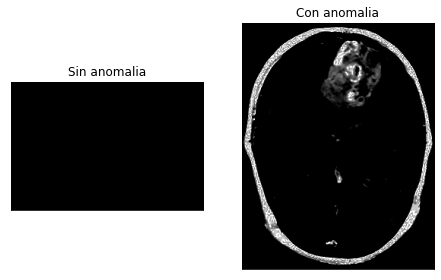

In [7]:
tumorNo = tumor(img,des=-199)
tumorSi= tumor(img2,des=-199)
plt.figure(figsize = (20,20))
plt.subplot(253)
plt.imshow(tumorNo, cmap = 'gray')
plt.title('Sin anomalia')
plt.xticks([]), plt.yticks([])  

plt.subplot(254)
plt.imshow(tumorSi, cmap = 'gray')
plt.title('Con anomalia')
plt.xticks([]), plt.yticks([])  

B. Aplicar algoritmos para la generación de pseudocolor que realcen las estructuras de las imágenes.

(([], []), ([], []))

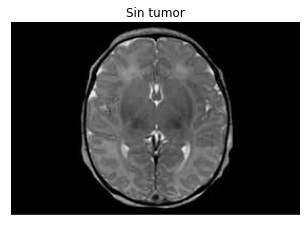

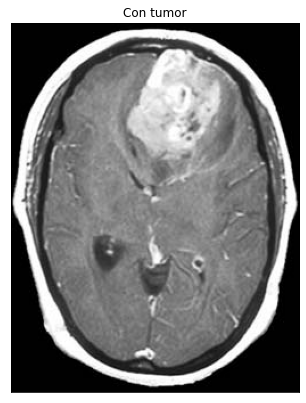

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("BrainTumor/No/12 no.jpg",-1)
img2 = cv.imread("BrainTumor/Si/Y13.jpg",-1)

plt.figure(figsize = (30,30))

plt.subplot(251)
plt.imshow(img, cmap = 'gray'),plt.title('Sin tumor')
plt.xticks([]), plt.yticks([]) 
plt.figure(figsize = (30,30))

plt.subplot(251)
plt.imshow(img2, cmap = 'gray'),plt.title('Con tumor')
plt.xticks([]), plt.yticks([]) 

In [9]:
img.shape

(183, 275, 3)

In [10]:
def Colorear(img):
    img2 = np.copy(img)
    f=len(img)
    c=len(img[0])
    i=0
    while(i<f):
        j=0
        while(j<c):     
            r , g, b = img2[i,j]
            #print ('b:',b,'g:',g,'r:',r)
            if((r>=0 and g>=0 and b>=0) and (r<=10 and g<=10 and b<=10)):
                #color plata
                r=192
                g=192
                b=192
                img2[i,j]=r,g,b
            if((r>=11 and g>=11 and b>=11) and (r<=25 and g<=25 and b<=25)):
                #color guayaba
                r=255
                g=87
                b=51
                img2[i,j]=r,g,b 
            if((r>=26 and g>=26 and b>=26) and (r<=35 and g<=35 and b<=35)):
                # color azul
                r=212
                g=51
                b=255
                img2[i,j]=r,g,b
            if((r>=36 and g>=36 and b >=36) and (r<=46 and g<=46 and b<=46)):
                # color azul
                r=0
                g=0
                b=255
                img2[i,j]=r,g,b
            if((r>=47 and g>=47 and b>=47) and (r<=50 and g<=50 and b<=50)):
                r = 245
                g = 158
                b = 81
                img2[i,j]=r,g,b
            if((r>=51 and g>=51 and b>=51) and (r<=75 and g <=75 and b<=75)):
                #color amarillo
                r=255
                g=255
                b=0
                img2[i,j]=r,g,b
            if((r>=75 and g>=75 and b>=75) and (r<=100 and g<=100 and b<=100)):
                # color azul
                r=0
                g=0
                b=255
                img2[i,j]=r,g,b
            if((r>=101 and g>=101 and b>=101) and (r<=150 and g<=150 and b<=150)):
                #color lima
                r=0
                g=255
                b=0
                img2[i,j]=r,g,b
            if((r>=151 and g>=151 and b>=151) and (r<=200 and g<=200 and b<=200)):
                #color blanco
                r=255
                g=255
                b=255
                img2[i,j]=r,g,b
            if((r>=201 and g>=201 and b>=201) and (r<=205 and g<=205 and b<=205)):
                #color cian
                r=0
                g=255
                b=255
                img2[i,j]=r,g,b
            if((r>=206 and g>=206 and b>=206) and (r<=210 and g<=210 and b<=210)):
                r = 43
                g=92
                b= 5
                img2[i,j]=r,g,b
            if((r>=211 and g>=211 and b>=211) and (r<=220 and g<=220 and b<=220)):
                r=0
                g=0
                b=0
                img2[i,j] = r, g, b
            if((r>=221 and g>=221 and b>=221) and (r<=235 and g<=235 and b<=235)):
                r=0
                g=98
                b=170
                img2[i,j] = r,g,b
            if((r>=236 and g>=236 and b>=236) and (r<=250 and g<=250 and b<=250)):
                r =25
                g=165
                b=15
                img2[i,j] = r,g,b
            if((r>=251 and g>=251 and b>=251) and (r<=255 and g<=255 and b<=255)):
                r=170
                g=170
                b=170
                img2[i,j]=r,g,b
                
            j=j+1
        i=i+1
        
    img2 = img2.astype('uint8')    
    return(img2)

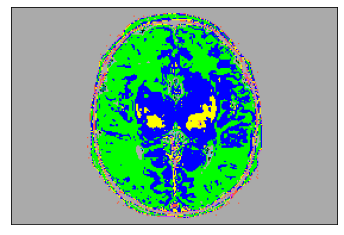

In [11]:

imgColor =Colorear(img)
plt.xticks([]),plt.yticks([])
plt.imshow(imgColor, cmap = 'gray')

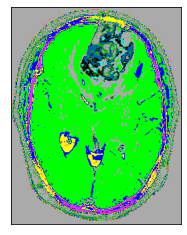

In [12]:
img2 = cv.imread("BrainTumor/Si/Y13.jpg",-1)
imgColor2 = Colorear(img2)
plt.xticks([]),plt.yticks([])
plt.imshow(imgColor2, cmap = 'gray')

c. Aplicar algoritmos de umbralización para seleccionar el área correspondiente a tumor. Extraer las estadísticas que indiquen el porcentaje que ocupa el tumor, en relación al volumen de la imagen cerebral.

El umbral es:  5.0


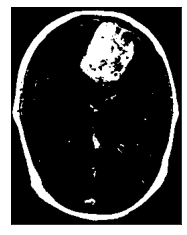

In [13]:
umbral, imgBin = cv.threshold (tumorSi, 5,255, cv.THRESH_BINARY)

plt.xticks([]),plt.yticks([])
plt.imshow(imgBin, cmap = 'gray')
print('El umbral es: ',umbral)

  

In [14]:
conectividad = 4
## salida es una tupla con 4 celdas
salida = cv.connectedComponentsWithStats(imgBin,umbral,conectividad)
#
## La primera celda contiene el numero de etiquetas
nEtiquetas = salida[0]
#
## La segunda celda contiene la matriz de etiquetas
imgEtiquetas = salida[1]
#
## La tercera celda contiene la matriz de estadisticas de cada region
estadisticas = salida[2]
#

centroides = salida[3]
#
## centroides es una matriz con las ubicaciones x e y de cada centroide. 
## La fila en dicha matriz corresponde al número de etiqueta.
#
#
############ Vamos a obtener una imagen con solo la region con el área  mayor  #########
#
## Se toma la posición de la región de mayor área
pos_max =np.argmax(estadisticas[:,cv.CC_STAT_AREA])
#
## se toman las coordenadas del centroide de la region de mayor área
f,c = np.rint(centroides[pos_max])
f = f.astype('int')
c = c.astype('int')
#
## Se obtiene la etiqueta (numero entero) de la region de mayor area
etiquetaMayor = imgEtiquetas[f,c]
#
## Se crea una imagen binaria solo con la region de mayor area
regionMayor = ((imgEtiquetas == etiquetaMayor)*1.0).astype('uint8')
#
#####################################################################
#
#############Eliminar los agujeros en la imagen
#
## Se hace una copia de la imagen binaria con la region de mayor area
cp_regionMayor1 = regionMayor.copy()
#
## Máscara  para realizar el relleno.
## el tamaño debe ser  2 píxeles mayor que la imagen.
#
h, w = regionMayor.shape[:2]
mascara = np.zeros((h+2, w+2), np.uint8)
## Se rellena desde la imagen desde el punto (0,0)
cv.floodFill(cp_regionMayor1, mascara, (0,0), 255)
#
## Se invierte la imagen rellena
cp_regionMayor1_inv = cv.bitwise_not(cp_regionMayor1)
#
## Se combinan las dos imagenes para obtener el primer plano
im_areaMayor = regionMayor | cp_regionMayor1_inv
##################################################################
#
## Se hace una copia de la imagen binaria con la region de mayor area
cp_regionMayor2 = im_areaMayor.copy()
## Se calcula el contorno de dicha la mayor area
contorno, jerarquia = cv.findContours(cp_regionMayor2, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

## Se crea una imagen con el contorno obtenido atras
#imgContorno = cv2.drawContours (cp_regionMayor2,contorno, -1, (100,255,50), 3)
imgNueva = np.zeros((h,w)).astype('uint8') # Imagen de fondo para ver solo  el contorno
imgContorno = cv.drawContours (imgNueva,contorno, -1, (100,255,50), 2)




(<matplotlib.image.AxesImage at 0x1349bd55d00>,
 Text(0.5, 1.0, 'Imagen Contorno'))

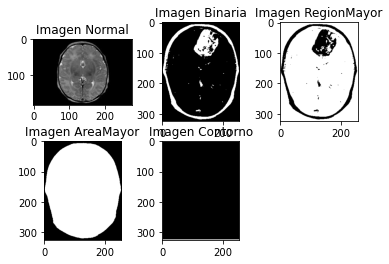

In [15]:
img = cv.imread("BrainTumor/No/12 no.jpg",0)
plt.subplot(231)
plt.imshow(img,'gray'),plt.title('Imagen Normal')
plt.subplot(232)
plt.imshow(imgBin,'gray'),plt.title('Imagen Binaria')
plt.subplot(233)
plt.imshow(regionMayor,'gray'),plt.title('Imagen RegionMayor')
plt.subplot(234)
plt.imshow(im_areaMayor,'gray'),plt.title('Imagen AreaMayor')
plt.subplot(235)
plt.imshow(imgContorno,'gray'),plt.title('Imagen Contorno')

In [16]:
conectividad = 4
## salida es una tupla con 4 celdas
salida = cv.connectedComponentsWithStats(imgBin,umbral,conectividad)
#
## La primera celda contiene el numero de etiquetas
nEtiquetas = salida[0]
#
## La segunda celda contiene la matriz de etiquetas
imgEtiquetas = salida[1]
#
## La tercera celda contiene la matriz de estadisticas de cada region
estadisticas = salida[2]
#

In [17]:

centroides = salida[3]
#
## centroides es una matriz con las ubicaciones x e y de cada centroide. 
## La fila en dicha matriz corresponde al número de etiqueta.
#
#
############ Vamos a obtener una imagen con solo la region con el área  mayor  #########
#
## Se toma la posición de la región de mayor área
pos_max =np.argmax(estadisticas[:,cv.CC_STAT_AREA])
#
## se toman las coordenadas del centroide de la region de mayor área
f,c = np.rint(centroides[pos_max])
f = f.astype('int')
c = c.astype('int')
#
## Se obtiene la etiqueta (numero entero) de la region de mayor area
etiquetaMayor = imgEtiquetas[f,c]
#
## Se crea una imagen binaria solo con la region de mayor area
regionMayor = ((imgEtiquetas == etiquetaMayor)*1.0).astype('uint8')
#
#####################################################################
#
#############Eliminar los agujeros en la imagen
#
## Se hace una copia de la imagen binaria con la region de mayor area
cp_regionMayor1 = regionMayor.copy()
#
## Máscara  para realizar el relleno.
## el tamaño debe ser  2 píxeles mayor que la imagen.
#
h, w = regionMayor.shape[:2]
mascara = np.zeros((h+2, w+2), np.uint8)
## Se rellena desde la imagen desde el punto (0,0)
cv.floodFill(cp_regionMayor1, mascara, (0,0), 255)
#
## Se invierte la imagen rellena
cp_regionMayor1_inv = cv.bitwise_not(cp_regionMayor1)
#
## Se combinan las dos imagenes para obtener el primer plano
im_areaMayor = regionMayor | cp_regionMayor1_inv
##################################################################
#
## Se hace una copia de la imagen binaria con la region de mayor area
cp_regionMayor2 = im_areaMayor.copy()
## Se calcula el contorno de dicha la mayor area
contorno, jerarquia = cv.findContours(cp_regionMayor2, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

## Se crea una imagen con el contorno obtenido atras
#imgContorno = cv2.drawContours (cp_regionMayor2,contorno, -1, (100,255,50), 3)
imgNueva = np.zeros((h,w)).astype('uint8') # Imagen de fondo para ver solo  el contorno
imgContorno = cv.drawContours (imgNueva,contorno, -1, (100,255,50), 2)


In [22]:
import pandas as pd
tablaStat = pd.DataFrame(estadisticas, columns = ['Left','Top','Width','Height','Area'])
tablaEstTumor = tablaStat[tablaStat["Area"]>=4000]
tablaEstTumor

,Left,Top,Width,Height,Area
0,0,0,254,325,70826
1,2,6,249,314,7278
3,103,24,81,90,4053
